<a href="https://colab.research.google.com/github/bhanu0925/DeepLearning/blob/main/ANN_Tenserflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
ROOT = "/content/drive/MyDrive/DeepLearning_Bhanu"
os.chdir(ROOT)

In [3]:
os.listdir()

['TensorFlow_and_Keras',
 'Untitled',
 'logs',
 'model_ckpt.h5',
 'callbacks_TensorFlow_and_Keras',
 'car1.jpg',
 'car.jpg',
 'dogcat']

In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.8.0'

In [6]:
tf.keras.__version__

'2.8.0'

In [7]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## A Simple calssifeir using keras Sequential API

## Data set MNIST

  - it a dataset of handwritten digits
  - each data point is 2d array of 28 X 28
  - it has 10 classes 0-9


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns


In [7]:
mnist = tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
X_train_full.shape


(60000, 28, 28)

Split in to validation set and normalizing imagedata

In [9]:
X_valid ,X_train = X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]


In [10]:
X_test = X_test/255.

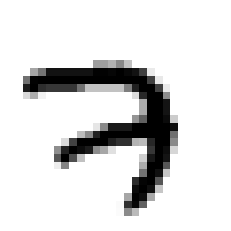

7

In [11]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()
y_train[0]

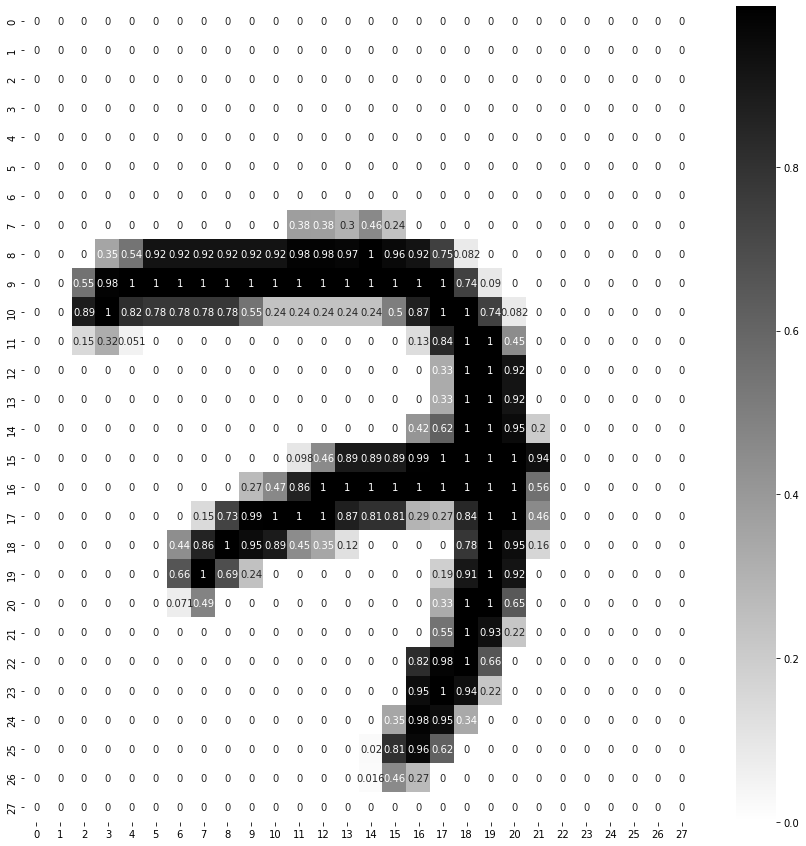

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap='binary')

## Setting up the layers for the NN

In [13]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28,28], name = "input_layers"),
          tf.keras.layers.Dense(300,activation='relu',name='hidden_layer1'),
          tf.keras.layers.Dense(100,activation='relu', name='hidden_layer2'),
          tf.keras.layers.Dense(10,activation='softmax',name = 'output_layer')
]

In [14]:
model = tf.keras.models.Sequential(LAYERS)

In [15]:
model.layers

In [16]:
model.get_weights()  ## randomly assigned weights

[array([[ 0.05515058,  0.05562089, -0.01291873, ...,  0.06153068,
         -0.04997486,  0.04388182],
        [ 0.04469937,  0.03404934,  0.03551044, ..., -0.00359101,
         -0.03047317,  0.05001905],
        [-0.02435129,  0.04446525, -0.06457652, ...,  0.04224613,
          0.01059981,  0.03965805],
        ...,
        [ 0.0142874 ,  0.06303941,  0.0188969 , ..., -0.0091329 ,
         -0.03486265, -0.05482267],
        [ 0.00728001, -0.03223052, -0.04495478, ...,  0.05179404,
          0.00241591, -0.0742773 ],
        [ 0.07095195, -0.04670148, -0.04258513, ...,  0.03705955,
          0.02563304,  0.06114657]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (Flatten)      (None, 784)               0         
                                                                 
 hidden_layer1 (Dense)       (None, 300)               235500    
                                                                 
 hidden_layer2 (Dense)       (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.layers[1]

In [19]:
model.get_layer("hidden_layer1")

#### GEtting weights of desired layers

In [20]:
model.get_layer("hidden_layer1").get_weights()

[array([[ 0.05515058,  0.05562089, -0.01291873, ...,  0.06153068,
         -0.04997486,  0.04388182],
        [ 0.04469937,  0.03404934,  0.03551044, ..., -0.00359101,
         -0.03047317,  0.05001905],
        [-0.02435129,  0.04446525, -0.06457652, ...,  0.04224613,
          0.01059981,  0.03965805],
        ...,
        [ 0.0142874 ,  0.06303941,  0.0188969 , ..., -0.0091329 ,
         -0.03486265, -0.05482267],
        [ 0.00728001, -0.03223052, -0.04495478, ...,  0.05179404,
          0.00241591, -0.0742773 ],
        [ 0.07095195, -0.04670148, -0.04258513, ...,  0.03705955,
          0.02563304,  0.06114657]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [21]:
weights, biases = model.get_layer("hidden_layer1").get_weights()

In [22]:
weights.shape

(784, 300)

In [23]:
biases.shape

(300,)

### Setting up loss function, optimizers amd metrics

In [24]:
LOSS_FUNC = "sparse_categorical_crossentropy"
OPTIMISER = "SGD"
METRICS = ['accuracy']

In [25]:
model.compile(loss = LOSS_FUNC, optimizer = OPTIMISER, metrics = METRICS)

Important -
Epochs: Integer.

Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.

batch_size: Integer or None.

Number of samples per gradient update. If unspecified, batch_size will default to 32.

NOTE: Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

validation_batch_size: Integer or None.

Number of samples per validation batch.

If unspecified, will default to batch_size.

NOTE: Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

In [28]:
EPOCHS = 30
VAL_SET = (X_valid,y_valid)

history = model.fit(X_train,y_train,
                    epochs = EPOCHS,
                    validation_data = VAL_SET)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5919 - accuracy: 0.8452 - val_loss: 0.2979 - val_accuracy: 0.9164
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2863 - accuracy: 0.9177 - val_loss: 0.2350 - val_accuracy: 0.9332
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2339 - accuracy: 0.9332 - val_loss: 0.1981 - val_accuracy: 0.9444
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1990 - accuracy: 0.9428 - val_loss: 0.1759 - val_accuracy: 0.9508
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1730 - accuracy: 0.9500 - val_loss: 0.1598 - val_accuracy: 0.9560
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1525 - accuracy: 0.9563 - val_loss: 0.1524 - val_accuracy: 0.9550
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1364 - accuracy: 0.9609 - val_loss: 0.1320 - val_accuracy:

In [29]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0717 - accuracy: 0.9781


[0.07172037661075592, 0.9781000018119812]

In [30]:
model.save('model.h5')

### load model

In [31]:
loded_model = tf.keras.models.load_model("model.h5")

In [32]:
loded_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0717 - accuracy: 0.9781


[0.07172037661075592, 0.9781000018119812]

In [33]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.591919,0.845164,0.297937,0.9164
1,0.286284,0.917745,0.235038,0.9332
2,0.233949,0.933236,0.198108,0.9444
3,0.198971,0.942782,0.175852,0.9508
4,0.173012,0.950018,0.159818,0.9560
5,0.152527,0.956291,0.152386,0.9550
6,0.136391,0.960927,0.132048,0.9622
7,0.123308,0.965364,0.123955,0.9656
8,0.111736,0.968527,0.114630,0.9688
9,0.102599,0.970436,0.110035,0.9704


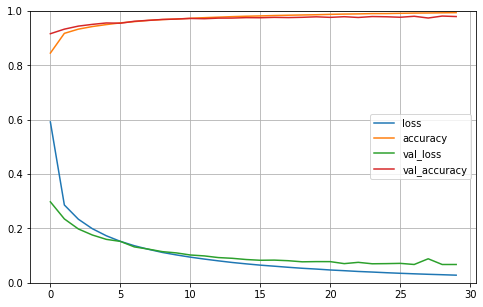

In [34]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [35]:
X_new = X_test[:3]
y_new = y_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred, y_new

(array([7, 2, 1]), array([7, 2, 1], dtype=uint8))

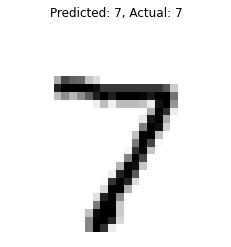

------------------------------------------------------------


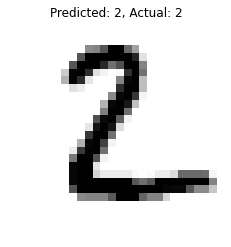

------------------------------------------------------------


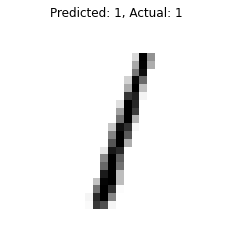

------------------------------------------------------------


In [37]:
for data, pred, actual in zip(X_new, y_pred, y_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)